(CellCycling_AccessingData)=
# Accessing and computing properities

In this page a general overview on how to access the loaded data is provided. The page covers the following topics:

* [Introduction on how to obtain the `CellCycling` object from a `FileManager` instance](CCAD_Introduction)
* [Use of the `hide` and `unhide` functions](CCAD_Hide)
* [Accessing the `Cycle` and `HalfCycle` objects](CCAD_Cycles)
* [Accessing the main attributes of the `HalfCycle` class](CCAD_Halfcycles_prop)
* [Accessing the main attributes of the `Cycle` class](CCAD_Cycles_prop)
* [Accessing the main attributes of the `CellCycling` class](CCAD_Cellcycling_prop)

(CCAD_Introduction)=
## Introduction

Once a `FileManager` instance has been created and the files have been parsed, all the experimental data can be extracted by directly invoking the generation of a `CellCycling` object by means of the `get_cellcycling` function. An exaple of a full workflows in reported in what follows:

In [1]:
from echemsuite.cellcycling.read_input import FileManager
from echemsuite.cellcycling.cycles import CellCycling

# Create a FileManager object and load/parse the example `.DTA` files
manager = FileManager()
manager.fetch_from_folder("./example_DTA", extension=".DTA")

# Get the cellcycling object from the FileManager
cellcycling = manager.get_cellcycling()

print(cellcycling)

Now that the `CellCycling` object representing the cycling experiment has been obtained all the experimental data and derived quantities can be accessed using the built-in class methods.

:::{admonition} The clean option
Please notice that in the previously examined workflow all the cycle have been loaded and marked as visible. Sometimes, however, the user may want to hide some of the cycles based on the assumption that only full charge/discharge cycles with efficiencies lower than 100% have physical meaning. This can be done automatically setting to `True` the `clean` flag in the `get_cellcycling` function according to the syntax:

```
cellcycling = manager.get_cellcycling(clean = True)
```

This will set the non-physical cycles to the hidden state. The effects of setting a cycle to the hidden state will be described in the next seciton.
::: 

(CCAD_Hide)=
## Hiding/Unhiding cycles

Each cycle in the `CellCycling` object can be hidden in order to prevent access to its properties and be ignored while iterating on a cellcycling instance. This can be achieved by using the function hide. Hidden status of a given cycle can be unset using the function unhide. An example snippet of code is available in what follows:

In [2]:
# Hide the second cycle
print("Hiding cycle 1")
cellcycling.hide([1])

# Print a list containing the hidden state of each cycle
for _cycle in cellcycling._cycles:
    status = "Hidden" if _cycle._hidden else "Visible"
    print(f"Cycle number {_cycle.number} is currently {status}")
print("")

# Accessing the hidden cycle will result in a NoneType return (see the next section)
print("*** Accessing hidden cycle ***")
hidden_cycle = cellcycling[1]
print(f" -> The function returned: {hidden_cycle}\n")

# Unhide the second cycle
print("Unhiding cycle 1")
cellcycling.unhide([1])

# Print a list containing the hidden state of each cycle
for _cycle in cellcycling._cycles:
    status = "Hidden" if _cycle._hidden else "Visible"
    print(f"Cycle number {_cycle.number} is currently {status}")

Hiding cycle 1
Cycle number 0 is currently Visible
Cycle number 1 is currently Hidden
Cycle number 2 is currently Visible
Cycle number 3 is currently Visible
Cycle number 4 is currently Visible

*** Accessing hidden cycle ***
ERROR: cycle 1 is currently hidden.
To reinstate it, use the unhide() function
 -> The function returned: None

Unhiding cycle 1
Cycle number 0 is currently Visible
Cycle number 1 is currently Visible
Cycle number 2 is currently Visible
Cycle number 3 is currently Visible
Cycle number 4 is currently Visible


(CCAD_Cycles)=
## Accessing a `Cycle` and its `HalfCycles`

As the name implies, the `CellCycling` object represents a collection of charge/discharge cycles. Each cycle is defined by a `Cycle` object that can be accessed either directly by index, leaving to the user the task of verifying its hidden status, or by using the built in `CellCycling` class iterator that will return sequentially all the non-hidden cycles.

In [3]:
# Accessing the second cycle by index
print(f"*** Getting cycle at index 1: {cellcycling[1]}\n")

# Accessing the cycles by iterator
print("*** Accessing the cycles by iterator")
for cycle in cellcycling:
    print(cycle)
print("")

# Hiding the second cycle
cellcycling.hide([1])

# Accessing the second cycle by index (will print an error and return None)
print(f"*** Getting cycle at index 1: {cellcycling[1]}\n")

# Accessing the cycles by iterator
print("*** Accessing the cycles by iterator")
for cycle in cellcycling:
    print(cycle)

# Un-hiding the second cycle
cellcycling.unhide([1])

*** Getting cycle at index 1: <echemsuite.cellcycling.cycles.Cycle object at 0x7f076928ef20>

*** Accessing the cycles by iterator

ERROR: cycle 1 is currently hidden.
To reinstate it, use the unhide() function
*** Getting cycle at index 1: None

*** Accessing the cycles by iterator


Once a `Cycle` object has been obtained from the `CellCycling` container the charge and discharge `HalfCycles` can be accessed directly according to the syntax:

In [4]:
first_cycle = cellcycling[0]

print(first_cycle.charge)
print(first_cycle.discharge)

(CCAD_Halfcycles_prop)=
## The `HalfCycle` properties

The `HalfCycle` object represents the base-building block of the `cellcycling.cycles` sub-module and, as discussed in more detail in the [API reference](API-cellcycling-cycles), it holds all the experimental data of a charge/discharge process namely:

* `time` (`pandas.core.series.Series`) time steps in seconds at which the experimental data have been collected
* `voltage` (`pandas.core.series.Series`) voltage in V recorded at each time step
* `current` (`pandas.core.series.Series`) currents in A recorded at each time step
* `power` (`pandas.core.series.Series`) instantaneous power in W computed at each time step
* `energy` (`pandas.core.series.Series`) instantaneous energy in mWh computed at each time step
* `Q` (`pandas.core.series.Series`) cumulative charge in mAh computed at each time step
* `capacity` (`float`) total capacity in mAh used in the halfcyle
* `total_energy` (`float`) total energy in mWh generated/dissipated in the halfcyle

All the properties can be accessed with the provided getter function. For example, the voltage profile of each half cycle as function of the capacity can be plotted as follows:

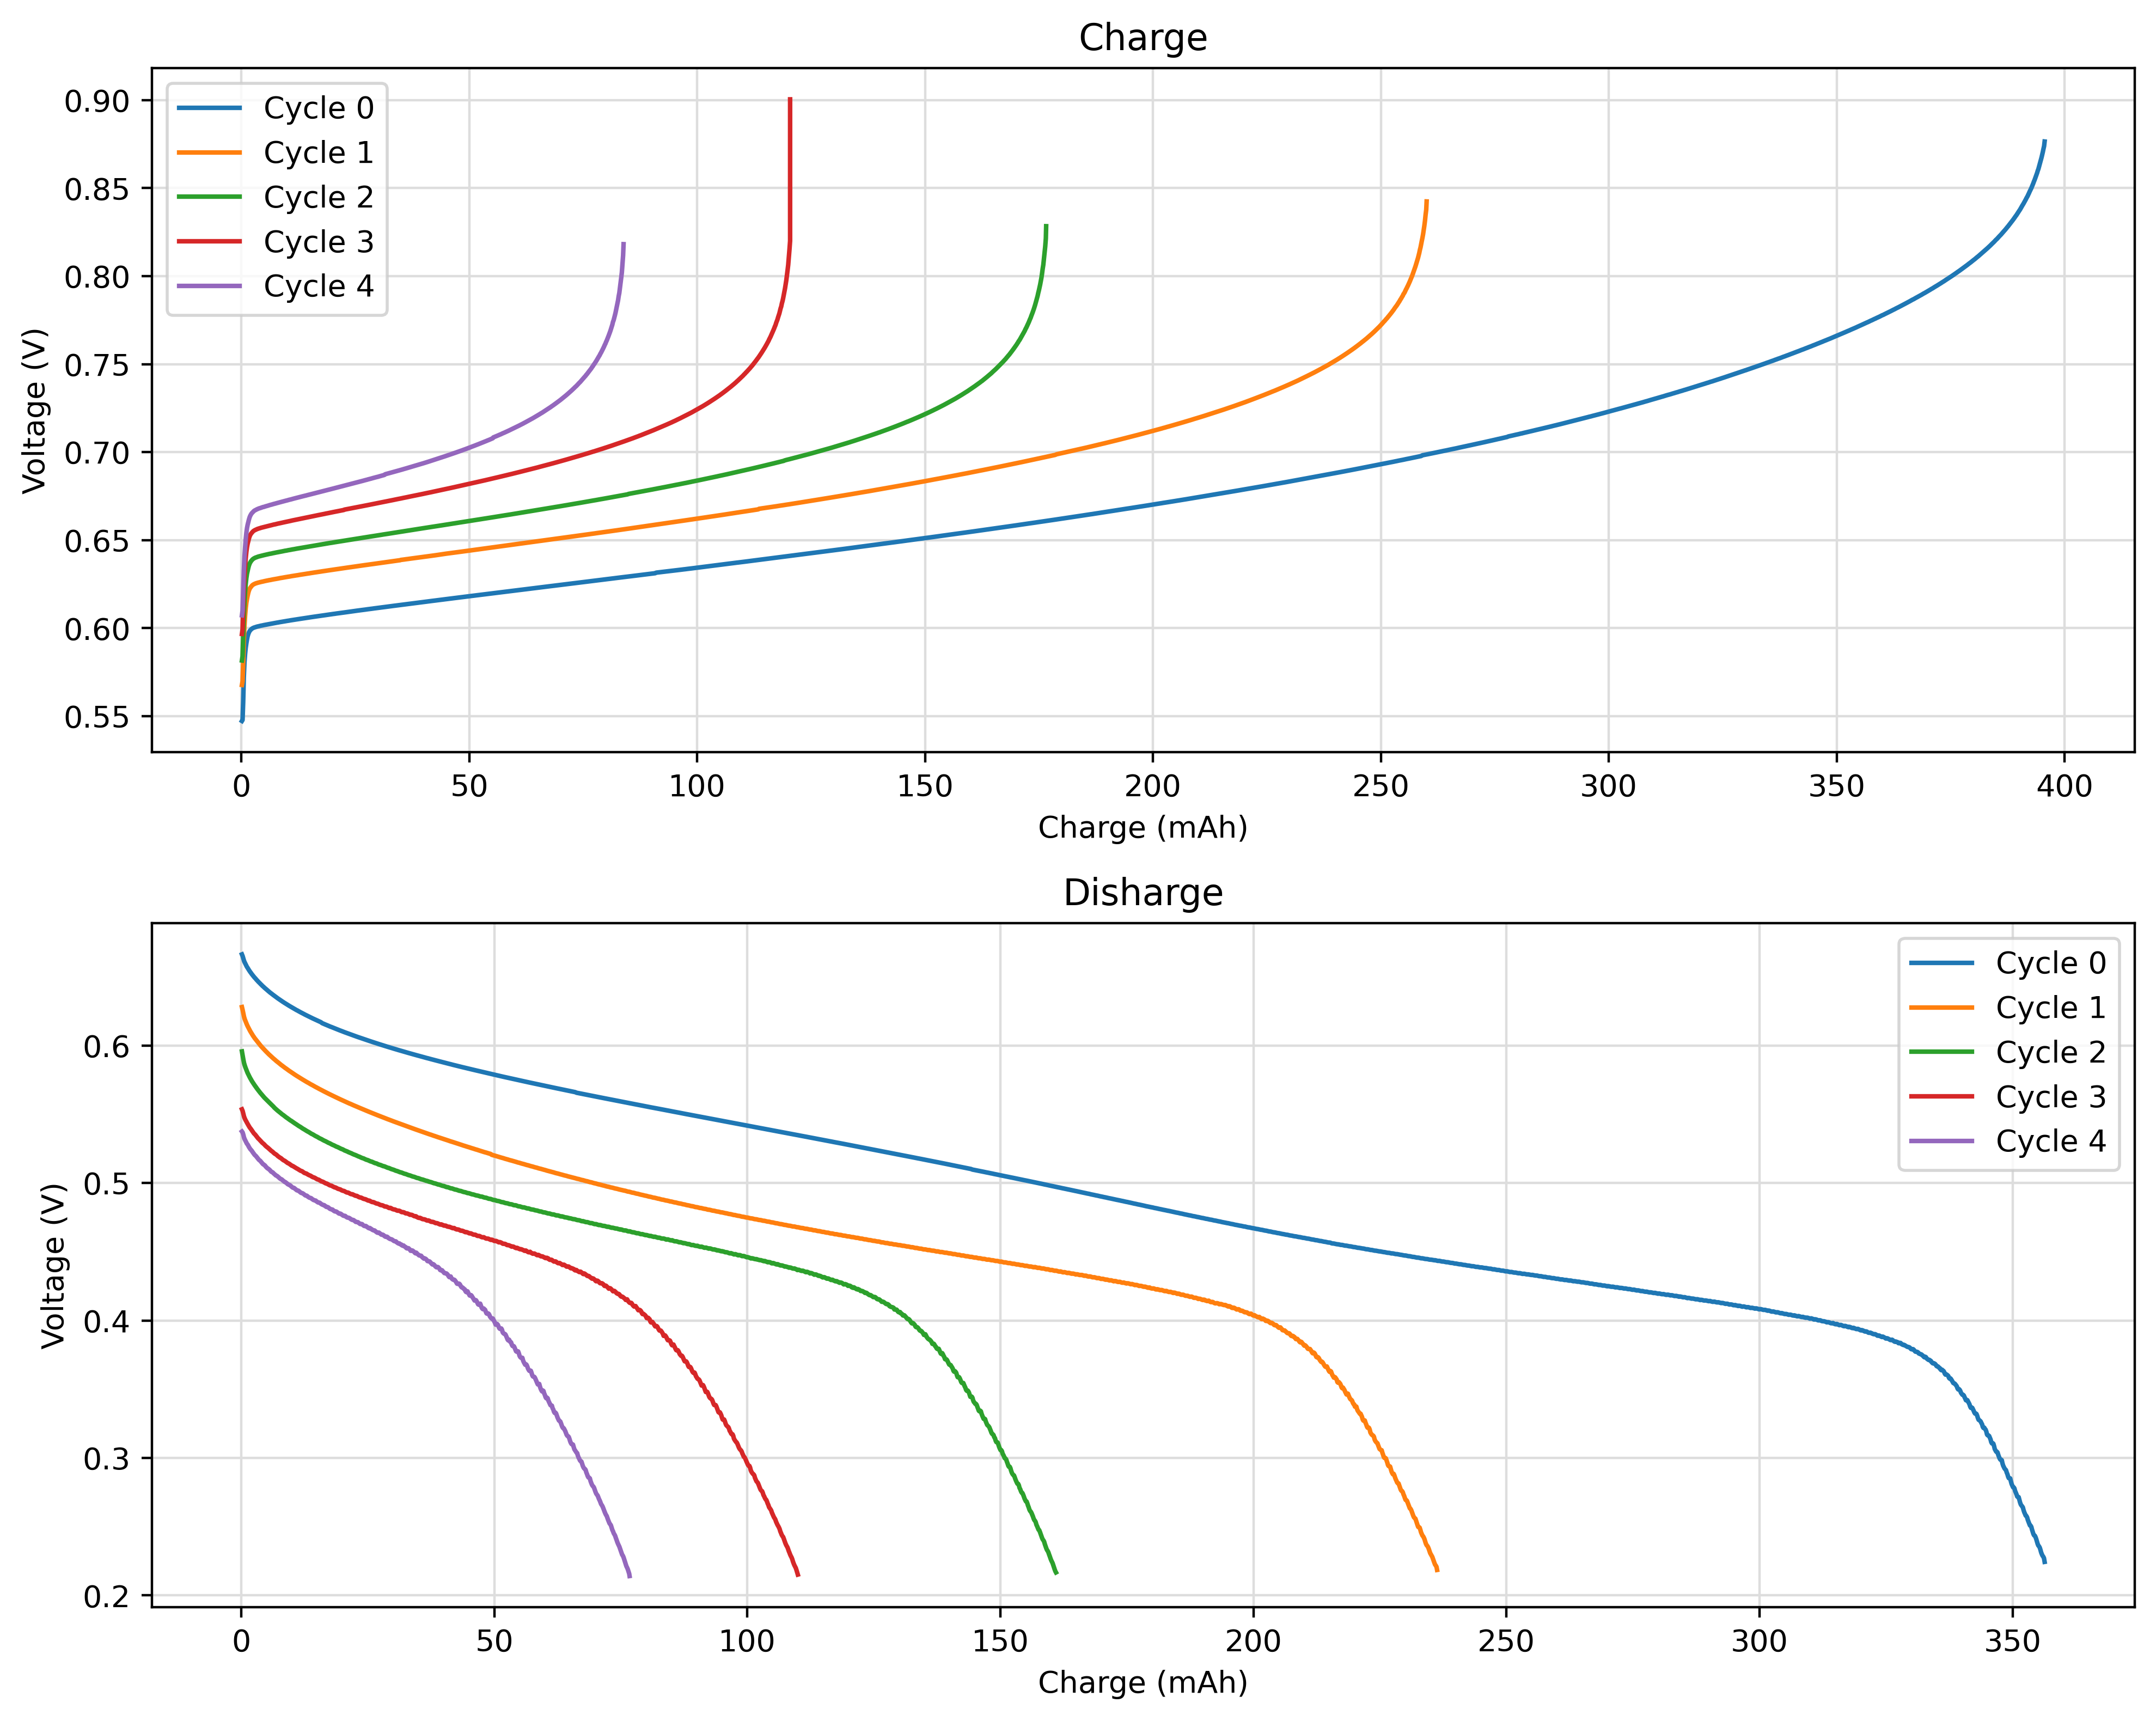

In [5]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8), dpi=400)

for cycle in cellcycling:
    charge = cycle.charge
    ax1.plot(charge.Q, charge.voltage, label=f"Cycle {cycle.number}")

ax1.set_title("Charge")
ax1.set_xlabel("Charge (mAh)")
ax1.set_ylabel("Voltage (V)")
ax1.grid(which="major", c="#DDDDDD")
ax1.legend()

for cycle in cellcycling:
    discharge = cycle.discharge
    ax2.plot(discharge.Q, discharge.voltage, label=f"Cycle {cycle.number}")

ax2.set_title("Disharge")
ax2.set_xlabel("Charge (mAh)")
ax2.set_ylabel("Voltage (V)")
ax2.grid(which="major", c="#DDDDDD")
ax2.legend()

plt.tight_layout()
plt.show()


(CCAD_Cycles_prop)=
## The `Cycle` properties

The `Cycle` object wraps the charge and discharge `HalfCycles` exposing, as a unified time-series, all the experimental data previously discussed for the `HalfCycle` object. As such the following properties are available:

* `time` (`pandas.core.series.Series`) time steps in seconds at which the experimental data have been collected
* `voltage` (`pandas.core.series.Series`) voltage in V recorded at each time step
* `current` (`pandas.core.series.Series`) currents in A recorded at each time step
* `power` (`pandas.core.series.Series`) instantaneous power in W computed at each time step
* `energy` (`pandas.core.series.Series`) instantaneous energy in mWh computed at each time step
* `Q` (`pandas.core.series.Series`) cumulative charge in mAh computed at each time step

The `Cycle` object also exposes new properties to the user such as the `coulomb_efficiency`, the `energy_efficiency` and the `voltage_efficiency` that can be easily obtained according to:

In [6]:
for cycle in cellcycling:
    print(f"Cycle: {cycle.number}")
    print("    - Coulomb efficiency: {:.2f}%".format(cycle.coulomb_efficiency))
    print("    - Energy efficiency: {:.2f}%".format(cycle.energy_efficiency))
    print("    - Voltage efficiency:  {:.2f}%".format(cycle.voltage_efficiency))
    print()

Cycle: 0
    - Coulomb efficiency: 90.07%
    - Energy efficiency: 63.99%
    - Voltage efficiency:  71.05%

Cycle: 1
    - Coulomb efficiency: 90.87%
    - Energy efficiency: 61.36%
    - Voltage efficiency:  67.53%

Cycle: 2
    - Coulomb efficiency: 91.17%
    - Energy efficiency: 59.89%
    - Voltage efficiency:  65.69%

Cycle: 3
    - Coulomb efficiency: 91.34%
    - Energy efficiency: 56.54%
    - Voltage efficiency:  61.90%

Cycle: 4
    - Coulomb efficiency: 91.50%
    - Energy efficiency: 54.09%
    - Voltage efficiency:  59.11%



(CCAD_Cellcycling_prop)=
## The `CellCycling` properties

The `CellCycling` class exposes, as lists, all the properties related to its `Cycles` objects such as:

* `coulomb_efficiencies` (`List[float]`) list of the `coulomb_efficiency` associated to each cycle 
* `energy_efficiencies` (`List[float]`) list of the `energy_efficiency` associated to each cycle
* `voltage_efficiencies` (`List[float]`) list of the `voltage_efficiency` associated to each cycle 

As an example let us print the efficiency data previously listed for each cycle:

In [7]:
print(cellcycling.coulomb_efficiencies)
print(cellcycling.energy_efficiencies)
print(cellcycling.voltage_efficiencies)

[90.06999917150961, 90.86607294184074, 91.17491744273714, 91.34470444898423, 91.49817119542074]
[63.99222869627161, 61.36387929231566, 59.89401879224805, 56.544915356531746, 54.08621790034328]
[71.04721803585099, 67.53222331022482, 65.69133317818992, 61.902784291246924, 59.11180211987686]


The `CellCycling` class also allows the user to evaluate the capacity retention of the cell in respect to a selected `reference` cycle.
This can be easily done according to:

In [10]:
# Capacity retentions taking the first cycle (default) as reference
print(f"Capacity retentions with the {cellcycling.reference+1}° cycle as reference:")
print(cellcycling.capacity_retention)
print("")

# Capacity retentions taking the second cycle as reference
cellcycling.reference = 1
print(f"Capacity retentions with the {cellcycling.reference+1}° cycle as reference:")
print(cellcycling.capacity_retention)

# Resetting the reference to the default value
cellcycling.reference = 0

Capacity retentions with the 2° cycle as reference:
[150.8038794557863, 100.0, 68.13266630806451, 46.54378834886762, 32.474482690996034]

Capacity retentions with the 2° cycle as reference:
[150.8038794557863, 100.0, 68.13266630806451, 46.54378834886762, 32.474482690996034]


The capacity retention values can be fit using a linear regression. Once the data have been fitted, the `capacity_fade` rate is automatically computed as the absolute value of the fitting-line slope. An example on how the fitting can be done and how the data can be plotted is reported in what follows:

INFO: fitting Capacity Retention data from cycle 0 to 4
INFO: fit equation: retention = -22.854027910716823 * cycle_number + 94.86972423811469
INFO: R^2 = 0.9647304680876875

Fitted capacity fade: 22.854027910716823 %/cycle


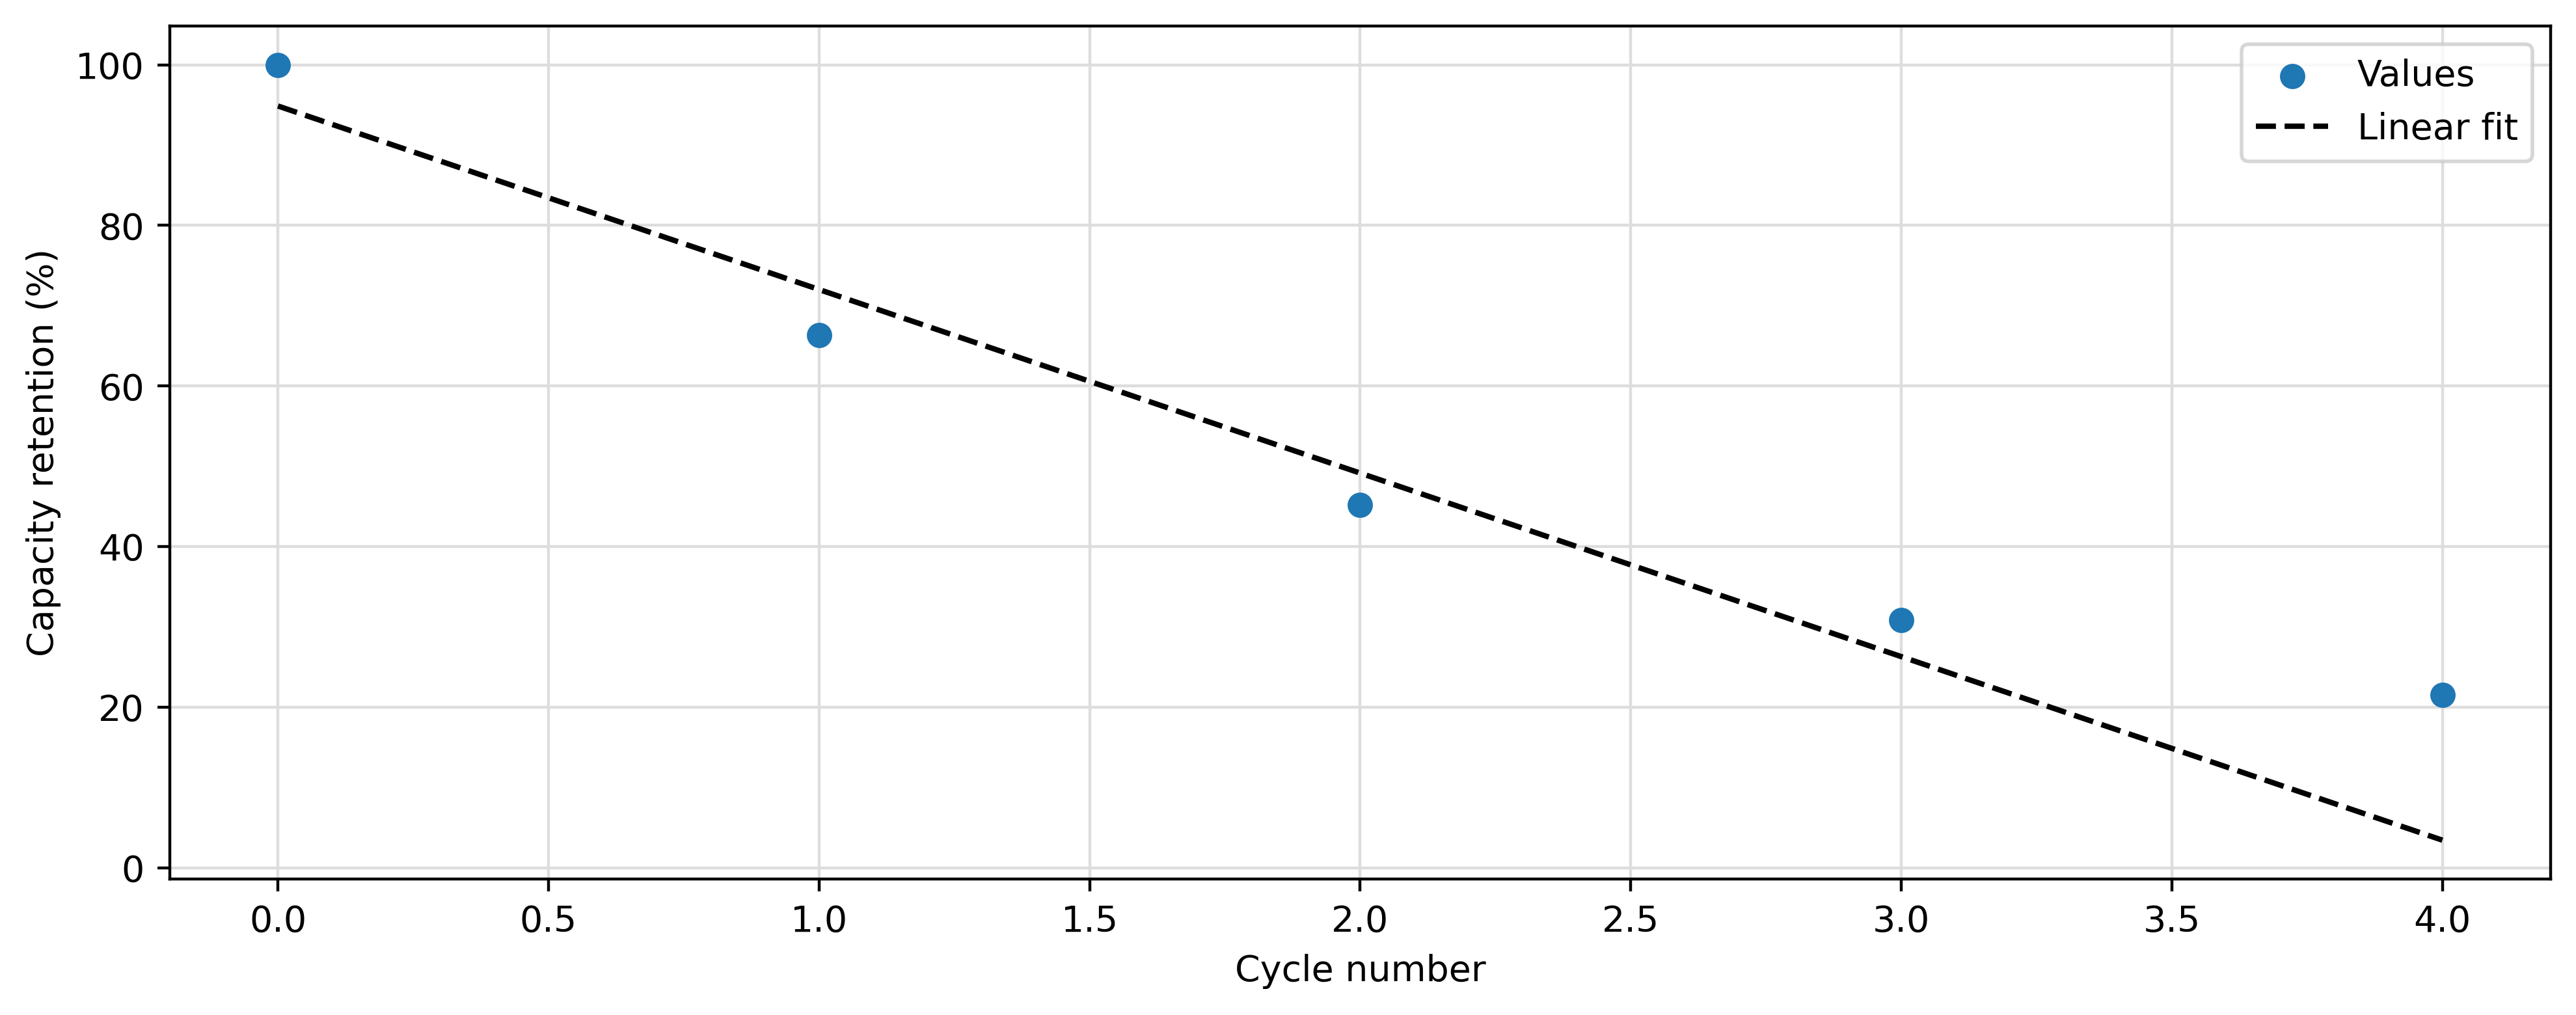

In [11]:
import matplotlib.pyplot as plt

# Run the fitting procedure on all the cycles
cellcycling.fit_retention(0, 4)

# Print the computed capacity fade:
print(f"\nFitted capacity fade: {cellcycling.capacity_fade} %/cycle")

# Create a figure
fig = plt.figure(figsize=(10, 4), dpi=400)

# Plot the capacity retention of each cycle
plt.scatter(cellcycling.numbers, cellcycling.capacity_retention, label="Values", zorder=3)

# Plot the linear fitting line
p = cellcycling.fit_parameters
X = [cellcycling.numbers[0], cellcycling.numbers[-1]]
Y = [p.slope*x+p.intercept for x in X]
plt.plot(X, Y, c="black", linestyle="--", label="Linear fit")

plt.xlabel("Cycle number")
plt.ylabel("Capacity retention (%)")
plt.grid(which="major", c="#DDDDDD")
plt.legend()
plt.tight_layout()
plt.show()

Given the fitting data, the user can also predict, using the `predict_retention` function, the capacity retention expected at a given cycle number and estimate, by calling the `retention_threshold` function, the cycle number at which the degradation in capacity retention will exceed a given threshold. An example snippet of code is reported in what follows:

In [15]:
# Predicting the retention
cycle_number = 3
prediction = cellcycling.predict_retention([cycle_number])
print(f"The predicted retention at cycle number {cycle_number} is {prediction[0] :.2f}%")

# Predicting retention thresholds
threshold = 40
prediction = cellcycling.retention_threshold([threshold])
print(f"The capacity retention will reach the {threshold}% threshold after cycle {prediction[0]}")

The predicted retention at cycle number 3 is 26.31%
The capacity retention will reach the 40% threshold after cycle 2
